<a href="https://colab.research.google.com/github/klmahalakshmi0102/Neural_Architecture_Project/blob/master/NA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/test'

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')

In [ ]:
folders

['/content/drive/MyDrive/data/train/Uninfected',
 '/content/drive/MyDrive/data/train/Parasite']

In [ ]:
### Create Model from scratch using CNN with kernel size 2
model1=Sequential()
model1.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(500,activation="relu"))
model1.add(Dense(2,activation="softmax"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True )


test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model1.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 22s 2s/step - loss: 0.3045 - accuracy: 0.8894 - val_loss: 0.5464 - val_accuracy: 0.7090
Epoch 2/20
13/13 [==============================] - 22s 2s/step - loss: 0.2872 - accuracy: 0.9014 - val_loss: 0.5575 - val_accuracy: 0.6642
Epoch 3/20
13/13 [==============================] - 22s 2s/step - loss: 0.2620 - accuracy: 0.8918 - val_loss: 0.5773 - val_accuracy: 0.7015
Epoch 4/20
13/13 [==============================] - 22s 2s/step - loss: 0.2755 - accuracy: 0.9038 - val_loss: 0.5637 - val_accuracy: 0.6791
Epoch 5/20
13/13 [==============================] - 22s 2s/step - loss: 0.2240 - accuracy: 0.9183 - val_loss: 0.5394 - val_accuracy: 0.7388
Epoch 6/20
13/13 [==============================] - 22s 2s/step - loss: 0.2140 - accuracy: 0.9207 - val_loss: 0.3830 - val_accuracy: 0.8358
Epoch 7/20
13/13 [==============================] - 25s 2s/step - loss: 0.2078 - accuracy: 0.9375 - val_loss: 0.3327 - val_accuracy: 0.8209
Epoch 8/20
13/13 [==

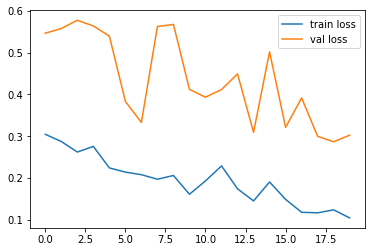

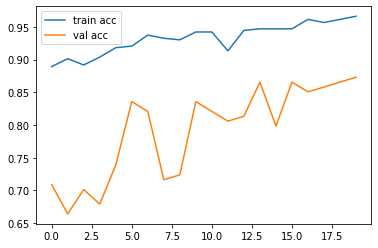

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
### Create Model from scratch using CNN with kernel size as 3
model2=Sequential()
model2.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(500,activation="relu"))
model2.add(Dense(2,activation="softmax"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model2.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 31s 2s/step - loss: 1.5166 - accuracy: 0.5192 - val_loss: 0.8439 - val_accuracy: 0.3209
Epoch 2/20
13/13 [==============================] - 29s 2s/step - loss: 0.6911 - accuracy: 0.6154 - val_loss: 0.6588 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 30s 2s/step - loss: 0.6804 - accuracy: 0.5168 - val_loss: 0.7370 - val_accuracy: 0.3209
Epoch 4/20
13/13 [==============================] - 29s 2s/step - loss: 0.6281 - accuracy: 0.7139 - val_loss: 0.8351 - val_accuracy: 0.3731
Epoch 5/20
13/13 [==============================] - 33s 3s/step - loss: 0.5340 - accuracy: 0.7236 - val_loss: 1.3200 - val_accuracy: 0.2985
Epoch 6/20
13/13 [==============================] - 29s 2s/step - loss: 0.6277 - accuracy: 0.6202 - val_loss: 0.8257 - val_accuracy: 0.3209
Epoch 7/20
13/13 [==============================] - 30s 2s/step - loss: 0.5518 - accuracy: 0.7115 - val_loss: 0.8683 - val_accuracy: 0.4179
Epoch 8/20
13/13 [==

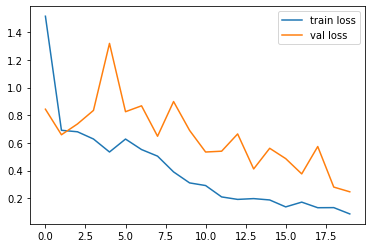

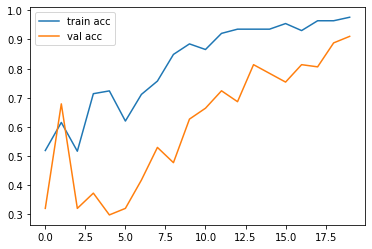

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
### Create Model from scratch using CNN with kernel size as 5
model3=Sequential()
model3.add(Conv2D(filters=16,kernel_size=5,padding="same",activation="relu",input_shape=(224,224,3)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=32,kernel_size=5,padding="same",activation ="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=64,kernel_size=5,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(500,activation="relu"))
model3.add(Dense(2,activation="softmax"))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      12832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model3.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 50s 4s/step - loss: 2.5181 - accuracy: 0.4712 - val_loss: 0.6934 - val_accuracy: 0.4776
Epoch 2/20
13/13 [==============================] - 49s 4s/step - loss: 0.6919 - accuracy: 0.5601 - val_loss: 0.6889 - val_accuracy: 0.6866
Epoch 3/20
13/13 [==============================] - 49s 4s/step - loss: 0.6894 - accuracy: 0.5577 - val_loss: 0.7014 - val_accuracy: 0.3955
Epoch 4/20
13/13 [==============================] - 49s 4s/step - loss: 0.6897 - accuracy: 0.5337 - val_loss: 0.6745 - val_accuracy: 0.6791
Epoch 5/20
13/13 [==============================] - 49s 4s/step - loss: 0.6856 - accuracy: 0.5697 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 6/20
13/13 [==============================] - 49s 4s/step - loss: 0.6844 - accuracy: 0.5769 - val_loss: 0.6907 - val_accuracy: 0.5149
Epoch 7/20
13/13 [==============================] - 49s 4s/step - loss: 0.6729 - accuracy: 0.5721 - val_loss: 0.7511 - val_accuracy: 0.3955
Epoch 8/20
13/13 [==

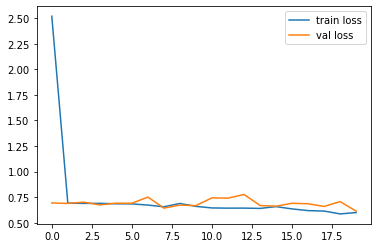

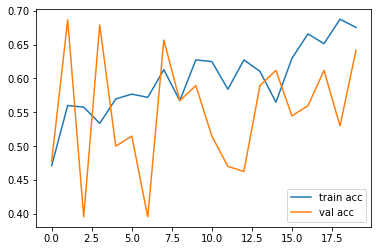

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
### Create Model from scratch using CNN with kernel size as 3 and activation function as softmax
model4=Sequential()
model4.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="softmax",input_shape=(224,224,3)))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="softmax"))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="softmax"))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(500,activation="softmax"))
model4.add(Dense(2,activation="softmax"))
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model4.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model4.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 34s 3s/step - loss: 0.6931 - accuracy: 0.4952 - val_loss: 0.6863 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 33s 3s/step - loss: 0.6919 - accuracy: 0.5288 - val_loss: 0.6792 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 33s 2s/step - loss: 0.6918 - accuracy: 0.5288 - val_loss: 0.6724 - val_accuracy: 0.6791
Epoch 4/20
13/13 [==============================] - 33s 2s/step - loss: 0.6920 - accuracy: 0.5288 - val_loss: 0.6692 - val_accuracy: 0.6791
Epoch 5/20
13/13 [==============================] - 33s 2s/step - loss: 0.6916 - accuracy: 0.5288 - val_loss: 0.6729 - val_accuracy: 0.6791
Epoch 6/20
13/13 [==============================] - 33s 2s/step - loss: 0.6917 - accuracy: 0.5288 - val_loss: 0.6753 - val_accuracy: 0.6791
Epoch 7/20
13/13 [==============================] - 33s 2s/step - loss: 0.6917 - accuracy: 0.5288 - val_loss: 0.6731 - val_accuracy: 0.6791
Epoch 8/20
13/13 [==

In [ ]:
### Create Model from scratch using CNN with kernel size as 3 and activation function as sigmoid
model5=Sequential()
model5.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(500,activation="relu"))
model5.add(Dense(2,activation="sigmoid"))
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model5.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model5.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 31s 2s/step - loss: 1.9842 - accuracy: 0.5000 - val_loss: 0.7231 - val_accuracy: 0.3209
Epoch 2/20
13/13 [==============================] - 30s 2s/step - loss: 0.6888 - accuracy: 0.5361 - val_loss: 0.6901 - val_accuracy: 0.5970
Epoch 3/20
13/13 [==============================] - 29s 2s/step - loss: 0.6733 - accuracy: 0.6346 - val_loss: 0.7186 - val_accuracy: 0.3582
Epoch 4/20
13/13 [==============================] - 29s 2s/step - loss: 0.6364 - accuracy: 0.6611 - val_loss: 0.9192 - val_accuracy: 0.3507
Epoch 5/20
13/13 [==============================] - 29s 2s/step - loss: 0.6368 - accuracy: 0.6346 - val_loss: 0.7572 - val_accuracy: 0.3657
Epoch 6/20
13/13 [==============================] - 29s 2s/step - loss: 0.5711 - accuracy: 0.7091 - val_loss: 0.7960 - val_accuracy: 0.3955
Epoch 7/20
13/13 [==============================] - 28s 2s/step - loss: 0.5032 - accuracy: 0.7428 - val_loss: 0.8697 - val_accuracy: 0.3731
Epoch 8/20
13/13 [==

In [ ]:
### Create Model from scratch using CNN with kernel size as 3 and activation function as sigmoid
model6=Sequential()
model6.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="sigmoid",input_shape=(224,224,3)))
model6.add(MaxPooling2D(pool_size=2))
model6.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="sigmoid"))
model6.add(MaxPooling2D(pool_size=2))
model6.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="sigmoid"))
model6.add(MaxPooling2D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(500,activation="sigmoid"))
model6.add(Dense(2,activation="sigmoid"))
model6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 28, 28, 64)     

In [ ]:
# tell the model what cost and optimization method to use
model6.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model6.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 31s 2s/step - loss: 6.4848 - accuracy: 0.5433 - val_loss: 3.9131 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 30s 2s/step - loss: 4.4295 - accuracy: 0.5288 - val_loss: 1.9114 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 30s 2s/step - loss: 1.6080 - accuracy: 0.5288 - val_loss: 0.7063 - val_accuracy: 0.3209
Epoch 4/20
13/13 [==============================] - 30s 2s/step - loss: 0.8542 - accuracy: 0.4712 - val_loss: 0.9345 - val_accuracy: 0.3209
Epoch 5/20
13/13 [==============================] - 31s 2s/step - loss: 0.7098 - accuracy: 0.5337 - val_loss: 0.6285 - val_accuracy: 0.6791
Epoch 6/20
13/13 [==============================] - 31s 2s/step - loss: 0.7084 - accuracy: 0.5288 - val_loss: 0.6752 - val_accuracy: 0.6791
Epoch 7/20
13/13 [==============================] - 30s 2s/step - loss: 0.6923 - accuracy: 0.5048 - val_loss: 0.7096 - val_accuracy: 0.3209
Epoch 8/20
13/13 [==

In [ ]:
### Create Model from scratch using CNN with kernel size as 3 and activation function as softmax and pooling size 3*3
model7=Sequential()
model7.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
model7.add(MaxPooling2D(pool_size=3))
model7.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
model7.add(MaxPooling2D(pool_size=3))
model7.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model7.add(MaxPooling2D(pool_size=3))
model7.add(Flatten())
model7.add(Dense(500,activation="relu"))
model7.add(Dense(2,activation="softmax"))
model7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 8, 8, 64)       

In [ ]:
# tell the model what cost and optimization method to use
model7.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model7.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 19s 1s/step - loss: 0.6996 - accuracy: 0.5288 - val_loss: 0.6421 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 18s 1s/step - loss: 0.5655 - accuracy: 0.6947 - val_loss: 0.7637 - val_accuracy: 0.4179
Epoch 3/20
13/13 [==============================] - 18s 1s/step - loss: 0.4543 - accuracy: 0.7933 - val_loss: 0.9511 - val_accuracy: 0.4552
Epoch 4/20
13/13 [==============================] - 18s 1s/step - loss: 0.3913 - accuracy: 0.8269 - val_loss: 0.7336 - val_accuracy: 0.6045
Epoch 5/20
13/13 [==============================] - 18s 1s/step - loss: 0.3109 - accuracy: 0.8582 - val_loss: 0.5890 - val_accuracy: 0.6493
Epoch 6/20
13/13 [==============================] - 18s 1s/step - loss: 0.2990 - accuracy: 0.8750 - val_loss: 0.5517 - val_accuracy: 0.6791
Epoch 7/20
13/13 [==============================] - 18s 1s/step - loss: 0.2760 - accuracy: 0.8966 - val_loss: 0.4314 - val_accuracy: 0.7537
Epoch 8/20
13/13 [==

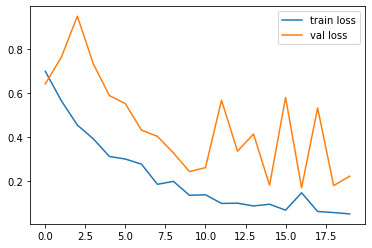

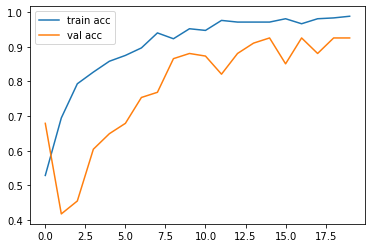

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
### Create Model from scratch using CNN with kernel size as 3 and activation function as softmax and pooling size 5
model8=Sequential()
model8.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
model8.add(MaxPooling2D(pool_size=5))
model8.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
model8.add(MaxPooling2D(pool_size=5))
model8.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model8.add(MaxPooling2D(pool_size=5))
model8.add(Flatten())
model8.add(Dense(500,activation="relu"))
model8.add(Dense(2,activation="softmax"))
model8.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 44, 44, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 1, 1, 64)       

In [ ]:
# tell the model what cost and optimization method to use
model8.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model8.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
13/13 [==============================] - 17s 1s/step - loss: 0.7045 - accuracy: 0.4928 - val_loss: 0.6584 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 15s 1s/step - loss: 0.6889 - accuracy: 0.5409 - val_loss: 0.6812 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 15s 1s/step - loss: 0.6607 - accuracy: 0.6274 - val_loss: 0.6899 - val_accuracy: 0.5299
Epoch 4/20
13/13 [==============================] - 15s 1s/step - loss: 0.5188 - accuracy: 0.7668 - val_loss: 0.7148 - val_accuracy: 0.5224
Epoch 5/20
13/13 [==============================] - 15s 1s/step - loss: 0.3847 - accuracy: 0.8125 - val_loss: 0.7618 - val_accuracy: 0.6045
Epoch 6/20
13/13 [==============================] - 15s 1s/step - loss: 0.3617 - accuracy: 0.8221 - val_loss: 0.5978 - val_accuracy: 0.5746
Epoch 7/20
13/13 [==============================] - 15s 1s/step - loss: 0.3067 - accuracy: 0.8750 - val_loss: 0.6365 - val_accuracy: 0.5970
Epoch 8/20
13/13 [==

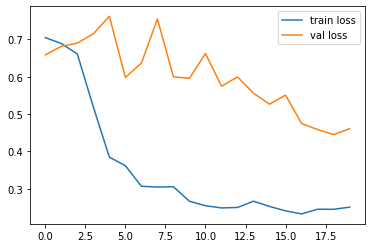

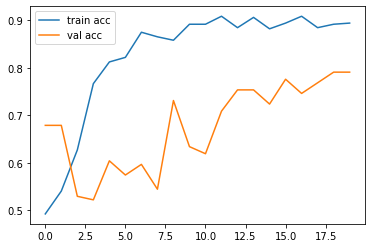

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')